In [23]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [53]:
df = pd.read_csv(r'./movies.csv', encoding = "ISO-8859-1")

In [54]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [55]:
#Checking for missing data
for col in df.columns : 
  prct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col,prct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [56]:
# data types for our columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [57]:
#Change data type of columns
df['budget'] = df['budget'].astype('int64')

df['gros'] = df['gross'].astype('int64')

In [58]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,gros
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,52287414
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,70136369
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,179800601
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,85160248
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,18564613


In [60]:
#Create correct year
df['correctYear'] = df['released'].astype(str).str[:4]
df['correctYear'] = df['correctYear'].astype('int64')

In [64]:
pd.set_option('display.max_rows', None)

In [65]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,gros,correctYear
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,936662225,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,760507625,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,658672302,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,652270625,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,623357910,2012


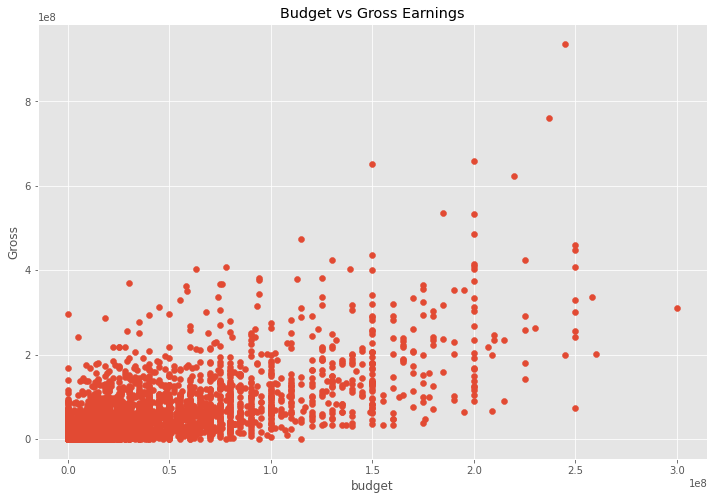

In [36]:
# Scatter Plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('budget')
plt.ylabel('Gross')
plt.show()

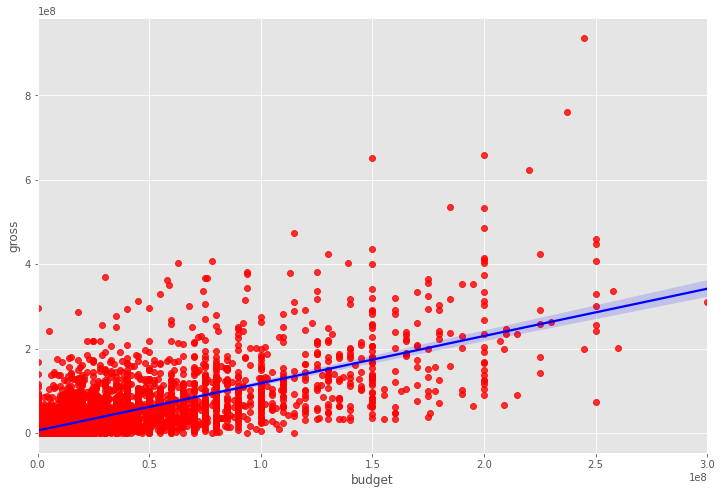

In [37]:
# Plot budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color" : "red"}, line_kws={"color": "blue"})

In [38]:
# Correlation Matrix between all numeric columns

df.corr(method='pearson')

,budget,gross,runtime,score,votes,year,gros
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009,0.712196
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548,1.000000
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639,0.224579
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276,0.165693
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304,0.662457
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000,0.191548
gros,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548,1.000000


In [39]:
df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year,gros
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114,0.523459
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585,1.000000
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785,0.139270
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451,0.033163
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625,0.479772
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000,0.098585
gros,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585,1.000000


In [40]:
df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year,gros
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553,0.698639
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467,1.000000
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902,0.202905
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598,0.045582
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588,0.667869
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000,0.139467
gros,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467,1.000000


Text(87.0, 0.5, 'Movie Features')

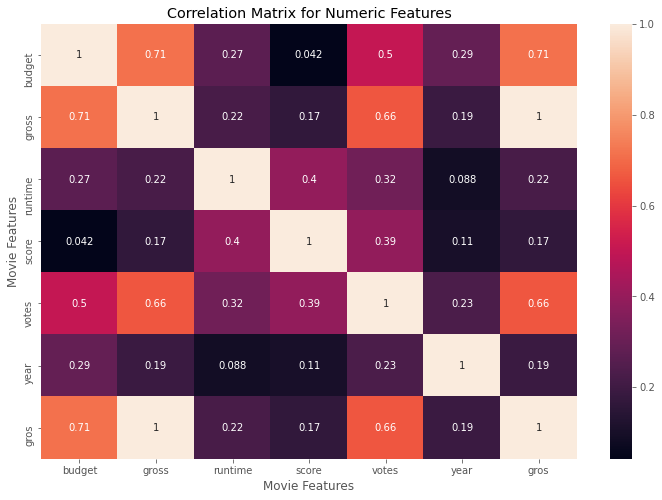

In [41]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [66]:
# Using factorize - this assigns a random numeric value for each unique categorical value
df_numerized = df.copy()

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()    

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,gros,correctYear
0,8000000,665,54,2192,1,52287414.0,4661,8,39,89,8.1,2454,299174,3716,1986,52287414,1986
1,6000000,1680,54,1296,4,70136369.0,1821,7,27,103,7.8,1605,264740,1970,1986,70136369,1986
2,15000000,1680,54,2645,0,179800601.0,6203,6,23,110,6.9,2345,236909,1852,1986,179800601,1986
3,18500000,2062,54,1066,0,85160248.0,295,8,33,137,8.4,2192,540152,1629,1986,85160248,1986
4,9000000,2122,54,2123,1,18564613.0,1872,6,36,90,6.9,1139,36636,2549,1986,18564613,1986


Text(87.0, 0.5, 'Movie Features')

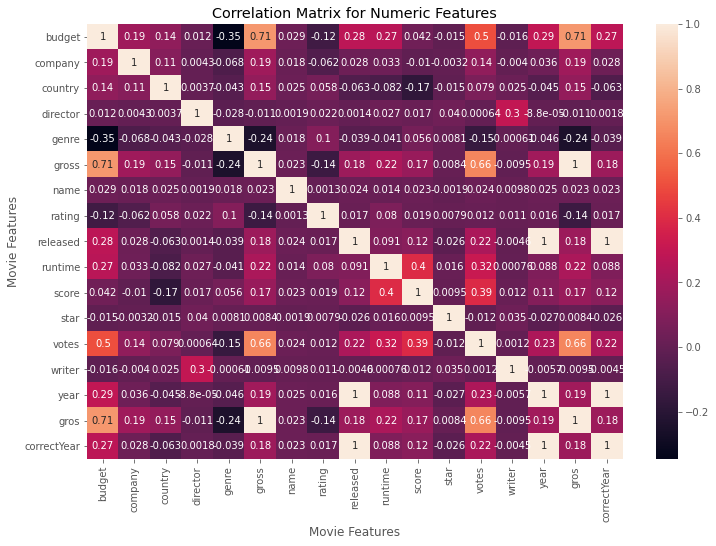

In [67]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [68]:
# We can now take a look at the ones that have a high correlation (> 0.5)

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs  = sorted_pairs[(sorted_pairs) > 0.5 ]
high_corr  = sorted_pairs[(sorted_pairs) <1 ]
high_corr

budget       votes          0.503924
votes        budget         0.503924
             gross          0.662457
gross        votes          0.662457
gros         votes          0.662457
votes        gros           0.662457
budget       gros           0.712196
gross        budget         0.712196
budget       gross          0.712196
gros         budget         0.712196
year         released       0.996187
released     year           0.996187
year         correctYear    0.996229
correctYear  year           0.996229
             released       0.999389
released     correctYear    0.999389
dtype: float64

In [72]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; y

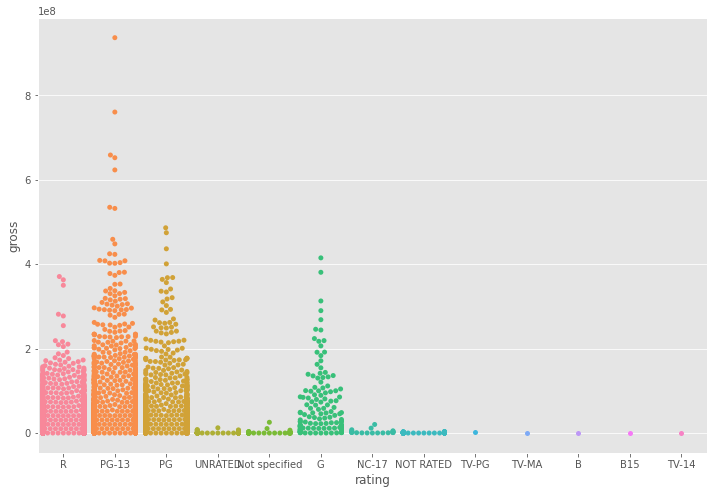

In [77]:
sns.swarmplot(x="rating", y="gross", data=df)